In [1]:
import tensorflow as tf

In [3]:
a = tf.constant(2)
b = tf.constant(3)
with tf.Session() as sess:
    print("a=2, b=3")
    print("Addition with constants: %i" % sess.run(a+b))
    print("Multiplication with constants: %i" % sess.run(a*b))

a=2, b=3
Addition with constants: 5
Multiplication with constants: 6


In [5]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a, b)
mul = tf.multiply(a, b)
with tf.Session() as sess:
    # Run every operation with variable input
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 6


In [7]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
product = tf.matmul(matrix1, matrix2)
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[12.]]


In [8]:
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [9]:
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [10]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [11]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [13]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [15]:
activation = tf.add(tf.multiply(X, W), b)

In [16]:
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch: 0001 cost= 0.272730231 W= 0.5131217 b= -0.95956266
Epoch: 0051 cost= 0.247118503 W= 0.48017073 b= -0.85728914
Epoch: 0101 cost= 0.227464363 W= 0.46645713 b= -0.7586346
Epoch: 0151 cost= 0.210079893 W= 0.4535594 b= -0.66584873
Epoch: 0201 cost= 0.194702774 W= 0.44142854 b= -0.57858074
Epoch: 0251 cost= 0.181101486 W= 0.43001932 b= -0.49650347
Epoch: 0301 cost= 0.169070825 W= 0.41928864 b= -0.41930747
Epoch: 0351 cost= 0.158429444 W= 0.40919605 b= -0.34670192
Epoch: 0401 cost= 0.149017066 W= 0.39970362 b= -0.2784146
Epoch: 0451 cost= 0.140691832 W= 0.39077586 b= -0.21418886
Epoch: 0501 cost= 0.133328184 W= 0.38237906 b= -0.15378313
Epoch: 0551 cost= 0.126815021 W= 0.3744817 b= -0.0969698
Epoch: 0601 cost= 0.121054284 W= 0.36705405 b= -0.04353563
Epoch: 0651 cost= 0.115959018 W= 0.36006808 b= 0.00672068
Epoch: 0701 cost= 0.111452401 W= 0.35349762 b= 0.05398798
Epoch: 0751 cost= 0.107466415 W= 0.34731796 b= 0.09844411
Epoch: 0801 cost= 0.103940994 W= 0.34150583 b= 0.14025612
Epoch: 

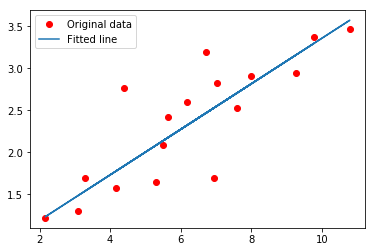

In [18]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [20]:
#######
#the logistic regression

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/Users/zhangchunyu/Downloads/projects/mnist", one_hot=True)

Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/zhangchunyu/Downloads/projects/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/zhangchunyu/Downloads/projects/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /Users/zhangchunyu/Downloads/projects/mnist/t10k-images-idx3-ubyte.gz
Extracting /Users/zhangchunyu/Downloads/projects/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [24]:
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

In [25]:
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

In [26]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [27]:
activation = tf.nn.softmax(tf.matmul(x, W) + b)

In [28]:
# Minimize error using cross entropy
# Cross entropy
cost = -tf.reduce_sum(y*tf.log(activation)) 
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

In [29]:
init = tf.initialize_all_variables()

In [32]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 29.973840472
Epoch: 0002 cost= 21.943272914
Epoch: 0003 cost= 21.056873987
Epoch: 0004 cost= 20.620348063
Epoch: 0005 cost= 20.141774274
Epoch: 0006 cost= 19.859094145
Epoch: 0007 cost= 19.766261680
Epoch: 0008 cost= 19.559928859
Epoch: 0009 cost= 19.289826989
Epoch: 0010 cost= 19.133579881
Epoch: 0011 cost= 19.127393136
Epoch: 0012 cost= 18.987054520
Epoch: 0013 cost= 18.919631242
Epoch: 0014 cost= 18.911849411
Epoch: 0015 cost= 18.839719786
Epoch: 0016 cost= 18.632711704
Epoch: 0017 cost= 18.571200793
Epoch: 0018 cost= 18.622702306
Epoch: 0019 cost= 18.489630599
Epoch: 0020 cost= 18.509504071
Epoch: 0021 cost= 18.453594574
Epoch: 0022 cost= 18.460840832
Epoch: 0023 cost= 18.303117810
Epoch: 0024 cost= 18.267246979
Epoch: 0025 cost= 18.353595890
Optimization Finished!
Accuracy: 0.922


In [44]:
#############alex net
# Parameters
learning_rate = 0.001
training_iters = 300000
batch_size = 64
display_step = 100

n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.8 # Dropout, probability to keep units

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

In [45]:
def conv2d(name, l_input, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(l_input, w, strides=[1, 1, 1, 1], 
                                                  padding='SAME'),b), name=name)

def max_pool(name, l_input, k):
    return tf.nn.max_pool(l_input, ksize=[1, k, k, 1], strides=[1, k, k, 1], 
                          padding='SAME', name=name)

def norm(name, l_input, lsize=4):
    return tf.nn.lrn(l_input, lsize, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name=name)

def alex_net(_X, _weights, _biases, _dropout):
    # Reshape input picture
    _X = tf.reshape(_X, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d('conv1', _X, _weights['wc1'], _biases['bc1'])
    # Max Pooling (down-sampling)
    pool1 = max_pool('pool1', conv1, k=2)
    # Apply Normalization
    norm1 = norm('norm1', pool1, lsize=4)
    # Apply Dropout
    norm1 = tf.nn.dropout(norm1, _dropout)

    # Convolution Layer
    conv2 = conv2d('conv2', norm1, _weights['wc2'], _biases['bc2'])
    # Max Pooling (down-sampling)
    pool2 = max_pool('pool2', conv2, k=2)
    # Apply Normalization
    norm2 = norm('norm2', pool2, lsize=4)
    # Apply Dropout
    norm2 = tf.nn.dropout(norm2, _dropout)

    # Convolution Layer
    conv3 = conv2d('conv3', norm2, _weights['wc3'], _biases['bc3'])
    # Max Pooling (down-sampling)
    pool3 = max_pool('pool3', conv3, k=2)
    # Apply Normalization
    norm3 = norm('norm3', pool3, lsize=4)
    # Apply Dropout
    norm3 = tf.nn.dropout(norm3, _dropout)

    # Fully connected layer
    # Reshape conv3 output to fit dense layer input
    dense1 = tf.reshape(norm3, [-1, _weights['wd1'].get_shape().as_list()[0]]) 
    # Relu activation
    dense1 = tf.nn.relu(tf.matmul(dense1, _weights['wd1']) + _biases['bd1'], name='fc1')
    
    # Relu activation
    dense2 = tf.nn.relu(tf.matmul(dense1, _weights['wd2']) + _biases['bd2'], name='fc2') 

    # Output, class prediction
    out = tf.matmul(dense2, _weights['out']) + _biases['out']
    return out

In [46]:
# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.random_normal([3, 3, 1, 64])),
    'wc2': tf.Variable(tf.random_normal([3, 3, 64, 128])),
    'wc3': tf.Variable(tf.random_normal([3, 3, 128, 256])),
    'wd1': tf.Variable(tf.random_normal([4*4*256, 1024])),
    'wd2': tf.Variable(tf.random_normal([1024, 1024])),
    'out': tf.Variable(tf.random_normal([1024, 10]))
}
biases = {
    'bc1': tf.Variable(tf.random_normal([64])),
    'bc2': tf.Variable(tf.random_normal([128])),
    'bc3': tf.Variable(tf.random_normal([256])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'bd2': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [47]:
pred = alex_net(x, weights, biases, keep_prob)

In [48]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [49]:
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [50]:
# Initializing the variables
init = tf.global_variables_initializer()

In [51]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " \
                  + "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")
    # Calculate accuracy for 256 mnist test images
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images[:256], 
                                                             y: mnist.test.labels[:256], 
                                                             keep_prob: 1.}))

Iter 6400, Minibatch Loss= 34276.148438, Training Accuracy= 0.56250
Iter 12800, Minibatch Loss= 19393.035156, Training Accuracy= 0.62500
Iter 19200, Minibatch Loss= 17423.998047, Training Accuracy= 0.73438
Iter 25600, Minibatch Loss= 11945.751953, Training Accuracy= 0.79688
Iter 32000, Minibatch Loss= 6998.734375, Training Accuracy= 0.85938
Iter 38400, Minibatch Loss= 2915.044678, Training Accuracy= 0.87500
Iter 44800, Minibatch Loss= 8352.572266, Training Accuracy= 0.85938
Iter 51200, Minibatch Loss= 4030.079590, Training Accuracy= 0.84375
Iter 57600, Minibatch Loss= 3487.095215, Training Accuracy= 0.87500
Iter 64000, Minibatch Loss= 2927.845215, Training Accuracy= 0.85938
Iter 70400, Minibatch Loss= 1162.272461, Training Accuracy= 0.93750
Iter 76800, Minibatch Loss= 4121.847168, Training Accuracy= 0.82812
Iter 83200, Minibatch Loss= 4033.260254, Training Accuracy= 0.89062
Iter 89600, Minibatch Loss= 4822.212402, Training Accuracy= 0.87500
Iter 96000, Minibatch Loss= 1462.036133, Trai

In [77]:
########a lstm character model over text8 data
import urllib
import zipfile
import random
import string
import os

In [85]:
url = 'http://mattmahoney.net/dc/'

def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  if not os.path.exists(filename):
    filename, _ = urllib.request.urlretrieve(url + filename, filename)
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    print(statinfo.st_size)
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename

filename = maybe_download("text8.zip", 31344016)

8548920


Exception: Failed to verify text8.zip. Can you get to it with a browser?

In [88]:
filename = "/Users/zhangchunyu/Downloads/projects/text8.zip"
def read_data(filename):
  f = zipfile.ZipFile(filename)
  for name in f.namelist():
    return f.read(name)
  f.close()
  
text = read_data(filename)
print("Data size", len(text))

Data size 100000000


In [90]:
valid_size = 1000
valid_text = text[:valid_size]
train_text = text[valid_size:]
train_size = len(train_text)
print(train_size, train_text[:64])
print(valid_size, valid_text[:64])

99999000 b'ons anarchists advocate social relations based upon voluntary as'
1000 b' anarchism originated as a term of abuse first used against earl'


In [107]:
vocabulary_size = len(string.ascii_lowercase) + 1 # [a-z] + ' '
first_letter = ord(string.ascii_lowercase[0])

def char2id(char):
  if char in string.ascii_lowercase:
    return ord(char) - first_letter + 1
  elif char == ' ':
    return 0
  else:
    print('Unexpected character:', char)
    return 0
  
def id2char(dictid):
  if dictid > 0:
    return chr(dictid + first_letter - 1)
  else:
    return ' '

print((char2id('a'), char2id('z'), char2id(' '), char2id('ï')))
print((id2char(1), id2char(26), id2char(0)))

Unexpected character: ï
(1, 26, 0, 0)
('a', 'z', ' ')


In [118]:
batch_size=64
num_unrollings=10
import numpy as np
class BatchGenerator(object):
  def __init__(self, text, batch_size, num_unrollings):
    self._text = text
    self._text_size = len(text)
    self._batch_size = batch_size
    self._num_unrollings = num_unrollings
    segment = self._text_size / batch_size
    self._cursor = [ int(offset * segment) for offset in range(batch_size)]
    self._last_batch = self._next_batch()
  
  def _next_batch(self):
    """Generate a single batch from the current cursor position in the data."""
    batch = np.zeros(shape=(self._batch_size, vocabulary_size), dtype=np.float)
    for b in range(self._batch_size):
      char_tmp = self._text[self._cursor[b]:self._cursor[b]+1]
      #print(b,self._cursor[b],char_tmp)
      batch[b, char2id(char_tmp.decode())] = 1.0
      self._cursor[b] = (self._cursor[b] + 1) % self._text_size
    return batch
  
  def next(self):
    """Generate the next array of batches from the data. The array consists of
    the last batch of the previous array, followed by num_unrollings new ones.
    """
    batches = [self._last_batch]
    for step in range(self._num_unrollings):
      batches.append(self._next_batch())
    self._last_batch = batches[-1]
    return batches

def characters(probabilities):
  """Turn a 1-hot encoding or a probability distribution over the possible
  characters back into its (mostl likely) character representation."""
  return [id2char(c) for c in np.argmax(probabilities, 1)]

def batches2string(batches):
  """Convert a sequence of batches back into their (most likely) string
  representation."""
  s = [''] * batches[0].shape[0]
  for b in batches:
    s = [''.join(x) for x in zip(s, characters(b))]
  return s

train_batches = BatchGenerator(train_text, batch_size, num_unrollings)
valid_batches = BatchGenerator(valid_text, 1, 1)

print(batches2string(train_batches.next()))
print(batches2string(train_batches.next()))
print(batches2string(valid_batches.next()))
print(batches2string(valid_batches.next()))

['ons anarchi', 'when milita', 'lleria arch', 'abbeys and ', 'arried urra', 'el and rich', 'and liturgi', ' opened for', 'n from the ', 'ration took', ' york other', 'oeing seven', 'sted with a', ' has probab', 'made to rec', 'ho received', 'gnificant t', 'ce critic o', 'ix eight in', 'le s uncaus', ' be lost as', 'tracellular', 'the size of', 'ss him a st', ' drugs conf', 'l take to c', 'e the pries', 'im to name ', 'd barred at', 'standard fo', 'such as eso', 'e on the gr', 'of the orig', 'hiver one n', 'eight march', ' lead chara', 'classical m', 'the non gm ', 'nalysis fun', 'ons believe', 'at least no', 'greed upon ', 'ystem examp', ' based on t', 'es the offi', 'ission at t', ' nine three', 'e linux ent', 'st daily co', 'ntration ca', ' nehru wish', ' stiff from', 'harman s sy', 'to to begin', 'itiatives t', 'these autho', 'cky ricardo', ' of mathema', 'nt of arm i', 'edited prog', 'external li', 'ther state ', 'ddhism espe', 'es possible']
['ists advoca', 'ary governm', 'hes nat

In [136]:
def logprob(predictions, labels):
  """Log-probability of the true labels in a predicted batch."""
  predictions[predictions < 1e-10] = 1e-10
  return np.sum(np.multiply(labels, -np.log(predictions))) / labels.shape[0]

def sample_distribution(distribution):
  """Sample one element from a distribution assumed to be an array of normalized
  probabilities.
  """
  r = random.uniform(0, 1)
  s = 0
  for i in range(len(distribution)):
    s += distribution[i]
    if s >= r:
      return i
  return len(distribution) - 1

def sample(prediction):
  """Turn a (column) prediction into 1-hot encoded samples."""
  p = np.zeros(shape=[1, vocabulary_size], dtype=np.float)
  p[0, sample_distribution(prediction[0])] = 1.0
  return p

def random_distribution():
  """Generate a random column of probabilities."""
  b = np.random.uniform(0.0, 1.0, size=[1, vocabulary_size])
  return b/np.sum(b, 1)[:,None]

In [137]:
num_nodes = 64

graph = tf.Graph()
with graph.as_default():
  
  # Parameters:
  # Input gate: input, previous output, and bias.
  ix = tf.Variable(tf.truncated_normal([vocabulary_size, num_nodes], -0.1, 0.1))
  im = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], -0.1, 0.1))
  ib = tf.Variable(tf.zeros([1, num_nodes]))
  # Forget gate: input, previous output, and bias.
  fx = tf.Variable(tf.truncated_normal([vocabulary_size, num_nodes], -0.1, 0.1))
  fm = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], -0.1, 0.1))
  fb = tf.Variable(tf.zeros([1, num_nodes]))
  # Memory cell: input, state and bias.                             
  cx = tf.Variable(tf.truncated_normal([vocabulary_size, num_nodes], -0.1, 0.1))
  cm = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], -0.1, 0.1))
  cb = tf.Variable(tf.zeros([1, num_nodes]))
  # Output gate: input, previous output, and bias.
  ox = tf.Variable(tf.truncated_normal([vocabulary_size, num_nodes], -0.1, 0.1))
  om = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], -0.1, 0.1))
  ob = tf.Variable(tf.zeros([1, num_nodes]))
  # Variables saving state across unrollings.
  saved_output = tf.Variable(tf.zeros([batch_size, num_nodes]), trainable=False)
  saved_state = tf.Variable(tf.zeros([batch_size, num_nodes]), trainable=False)
  # Classifier weights and biases.
  w = tf.Variable(tf.truncated_normal([num_nodes, vocabulary_size], -0.1, 0.1))
  b = tf.Variable(tf.zeros([vocabulary_size]))
  
  # Definition of the cell computation.
  def lstm_cell(i, o, state):
    """Create a LSTM cell. See e.g.: http://arxiv.org/pdf/1402.1128v1.pdf
    Note that in this formulation, we omit the various connections between the
    previous state and the gates."""
    input_gate = tf.sigmoid(tf.matmul(i, ix) + tf.matmul(o, im) + ib)
    forget_gate = tf.sigmoid(tf.matmul(i, fx) + tf.matmul(o, fm) + fb)
    update = tf.matmul(i, cx) + tf.matmul(o, cm) + cb
    state = forget_gate * state + input_gate * tf.tanh(update)
    output_gate = tf.sigmoid(tf.matmul(i, ox) + tf.matmul(o, om) + ob)
    return output_gate * tf.tanh(state), state

  # Input data.
  train_data = list()
  for _ in range(num_unrollings + 1):
    train_data.append(
      tf.placeholder(tf.float32, shape=[batch_size,vocabulary_size]))
  train_inputs = train_data[:num_unrollings]
  train_labels = train_data[1:]  # labels are inputs shifted by one time step.

  # Unrolled LSTM loop.
  outputs = list()
  output = saved_output
  state = saved_state
  for i in train_inputs:
    output, state = lstm_cell(i, output, state)
    outputs.append(output)

  # State saving across unrollings.
  with tf.control_dependencies([saved_output.assign(output),
                                saved_state.assign(state)]):
    # Classifier.
    print(tf.concat(outputs,0),w.shape,b.shape)
    logits = tf.nn.xw_plus_b(tf.concat(outputs,0), w, b)
    loss = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(
         labels=tf.concat(train_labels,0),logits=logits))

  # Optimizer.
  global_step = tf.Variable(0)
  learning_rate = tf.train.exponential_decay(
    10.0, global_step, 5000, 0.1, staircase=True)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate)
  gradients, v = zip(*optimizer.compute_gradients(loss))
  gradients, _ = tf.clip_by_global_norm(gradients, 1.25)
  optimizer = optimizer.apply_gradients(
    zip(gradients, v), global_step=global_step)

  # Predictions.
  train_prediction = tf.nn.softmax(logits)
  
  # Sampling and validation eval: batch 1, no unrolling.
  sample_input = tf.placeholder(tf.float32, shape=[1, vocabulary_size])
  saved_sample_output = tf.Variable(tf.zeros([1, num_nodes]))
  saved_sample_state = tf.Variable(tf.zeros([1, num_nodes]))
  reset_sample_state = tf.group(
    saved_sample_output.assign(tf.zeros([1, num_nodes])),
    saved_sample_state.assign(tf.zeros([1, num_nodes])))
  sample_output, sample_state = lstm_cell(
    sample_input, saved_sample_output, saved_sample_state)
  with tf.control_dependencies([saved_sample_output.assign(sample_output),
                                saved_sample_state.assign(sample_state)]):
    sample_prediction = tf.nn.softmax(tf.nn.xw_plus_b(sample_output, w, b))

Tensor("concat:0", shape=(640, 64), dtype=float32) (64, 27) (27,)


In [138]:
num_steps = 7001
summary_frequency = 100

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print('Initialized')
  mean_loss = 0
  for step in range(num_steps):
    batches = train_batches.next()
    feed_dict = dict()
    for i in range(num_unrollings + 1):
      feed_dict[train_data[i]] = batches[i]
    _, l, predictions, lr = session.run(
      [optimizer, loss, train_prediction, learning_rate], feed_dict=feed_dict)
    mean_loss += l
    if step % summary_frequency == 0:
      if step > 0:
        mean_loss = mean_loss / summary_frequency
      # The mean loss is an estimate of the loss over the last few batches.
      print('Average loss at step', step, ':', mean_loss, 'learning rate:', lr)
      mean_loss = 0
      labels = np.concatenate(list(batches)[1:])
      print('Minibatch perplexity: %.2f' % float(
        np.exp(logprob(predictions, labels))))
      if step % (summary_frequency * 10) == 0:
        # Generate some samples.
        print('=' * 80)
        for _ in range(5):
          feed = sample(random_distribution())
          sentence = characters(feed)[0]
          reset_sample_state.run()
          for _ in range(79):
            prediction = sample_prediction.eval({sample_input: feed})
            feed = sample(prediction)
            sentence += characters(feed)[0]
          print(sentence)
        print('=' * 80)
      # Measure validation set perplexity.
      reset_sample_state.run()
      valid_logprob = 0
      for _ in range(valid_size):
        b = valid_batches.next()
        predictions = sample_prediction.eval({sample_input: b[0]})
        valid_logprob = valid_logprob + logprob(predictions, b[1])
      print('Validation set perplexity: %.2f' % float(np.exp(
        valid_logprob / valid_size)))

Initialized
Average loss at step 0 : 3.293534755706787 learning rate: 10.0
Minibatch perplexity: 26.94
yxa etecpdfdseqyfmlefnjjaqu oinvs cenbem jvggexeahsz lnooa nntueoud ete sa  evcn
ppgfmkqb  tcsnyioduse eqgiesesap qvm scu xbsf  fvrwc  lbgnyknkjqjjrifpeaiam nmyl
oo ipnrtmkib nsospv n eqfhildamliuesywnnspnh b   brhyliuagdlt ut om aaaooljppt g
zatacca eqaolqknjgsdaeuszeidsirzsilagxjg gsatpqq o ttvcwtjg qdidv qir by pjntmqa
qmydxonccl gq ioor rvic   aop f  iypjb titihceenl aaollillst ragkhcmciicslseferr
Validation set perplexity: 20.10
Average loss at step 100 : 2.5868499302864074 learning rate: 10.0
Minibatch perplexity: 10.11
Validation set perplexity: 11.29
Average loss at step 200 : 2.2547388815879823 learning rate: 10.0
Minibatch perplexity: 7.74
Validation set perplexity: 8.90
Average loss at step 300 : 2.0982280242443085 learning rate: 10.0
Minibatch perplexity: 6.73
Validation set perplexity: 7.64
Average loss at step 400 : 1.9846902918815612 learning rate: 10.0
Minibatch perple

Validation set perplexity: 4.45
Average loss at step 4300 : 1.611699321269989 learning rate: 10.0
Minibatch perplexity: 4.52
Validation set perplexity: 4.47
Average loss at step 4400 : 1.6048918795585632 learning rate: 10.0
Minibatch perplexity: 4.69
Validation set perplexity: 4.33
Average loss at step 4500 : 1.6153822469711303 learning rate: 10.0
Minibatch perplexity: 5.41
Validation set perplexity: 4.47
Average loss at step 4600 : 1.6112724506855012 learning rate: 10.0
Minibatch perplexity: 5.32
Validation set perplexity: 4.55
Average loss at step 4700 : 1.6197839021682738 learning rate: 10.0
Minibatch perplexity: 4.50
Validation set perplexity: 4.56
Average loss at step 4800 : 1.6280920910835266 learning rate: 10.0
Minibatch perplexity: 5.19
Validation set perplexity: 4.58
Average loss at step 4900 : 1.6292267894744874 learning rate: 10.0
Minibatch perplexity: 5.82
Validation set perplexity: 4.61
Average loss at step 5000 : 1.6043220698833465 learning rate: 1.0
Minibatch perplexity: